# ePSproc frame definitions & rotations tests
11/12/19

## Load functions

In [1]:
import sys
# import os
# import time
import numpy as np

# For module testing, include path to module here
# modPath = r'D:\code\github\ePSproc'
modPath = r'/home/femtolab/github/ePSproc/'
sys.path.append(modPath)
import epsproc as ep

* pyevtk not found, VTK export not available. 
* plotly not found, plotly plots not available. 


## Polarization geometries

In [2]:
# Set default frame defns
RXdefault = ep.setPolGeoms()
print(RXdefault)

<xarray.DataArray (Euler: 3)>
array([quaternion(1, -0, 0, 0),
       quaternion(0.707106781186548, -0, 0.707106781186547, 0),
       quaternion(0.5, -0.5, 0.5, 0.5)], dtype=quaternion)
Coordinates:
  * Euler    (Euler) MultiIndex
  - P        (Euler) float64 0.0 0.0 1.571
  - T        (Euler) float64 0.0 1.571 1.571
  - C        (Euler) float64 0.0 0.0 0.0
    Labels   (Euler) <U18 'z' 'x' 'y'


In [21]:
# Set some additional test geometries
pRot = [0, 0, np.pi/2, np.pi/2]
tRot = [np.pi/4, -np.pi/4, np.pi/4, 3*np.pi/4]
cRot = [0, 0, 0, 0]
labels = ['+45x', '-45x', '+45y', '+135y']

eulerAngs = np.array([pRot, tRot, cRot]).T

RX = ep.setPolGeoms(eulerAngs = eulerAngs, labels = labels)
RX

<xarray.DataArray (Euler: 4)>
array([quaternion(0.923879532511287, -0, 0.38268343236509, 0),
       quaternion(0.923879532511287, 0, -0.38268343236509, 0),
       quaternion(0.653281482438188, -0.270598050073098, 0.270598050073099, 0.653281482438188),
       quaternion(0.270598050073099, -0.653281482438188, 0.653281482438188, 0.270598050073099)],
      dtype=quaternion)
Coordinates:
  * Euler    (Euler) MultiIndex
  - P        (Euler) float64 0.0 0.0 1.571 1.571
  - T        (Euler) float64 0.7854 -0.7854 0.7854 2.356
  - C        (Euler) float64 0.0 0.0 0.0 0.0
    Labels   (Euler) <U32 '+45x' '-45x' '+45y' '+135y'

## Check frame defns + rotations
Set a $Y_{0,0} + Y_{1,0}$ function and rotate.

In [4]:
# Set using blmXarray() - OK for plotting, but data not currently compatible with frame rotation code.
# Y10 = ep.blmXarray(np.array([1,0,1], ndmin=2), 1)
# Y10 = ep.blmXarray(np.array([[0,0,1],[1,0,1.3]]), 1)

# Set using setADMs()
# Y10 = ep.setADMs(np.array([1,0,1], ndmin=2), addS = True)
Y10 = ep.setADMs(np.array([[0,0,1],[1,0,1.3]]), addS = True)
Y10

<xarray.DataArray (ADM: 2, t: 1)>
array([[1. ],
       [1.3]])
Coordinates:
  * ADM      (ADM) MultiIndex
  - K        (ADM) int64 0 1
  - Q        (ADM) int64 0 0
  - S        (ADM) int64 0 0
  * t        (t) int64 0
Attributes:
    dataType:  ADM

In [5]:
# Y10.copy().unstack('ADM').rename({'K':'l', 'Q':'m'}).drop('S').stack({'BLM':('l','m')})

Plotting with mpl


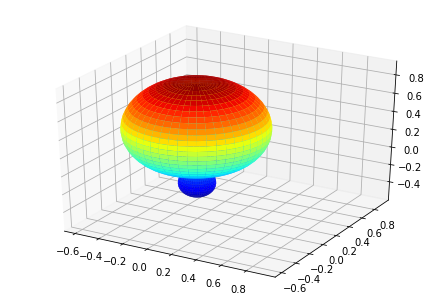

In [6]:
# ep.sphFromBLMPlot(Y10, facetDim = 'Eke', pType='a', plotFlag = True);
ep.sphFromBLMPlot(Y10, pType='a', plotFlag = True);

Plotting with mpl
Data dims: ('Euler', 'Theta', 'Phi'), subplots on Euler


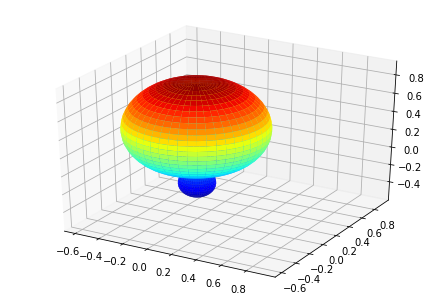

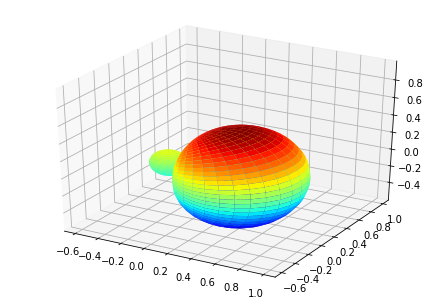

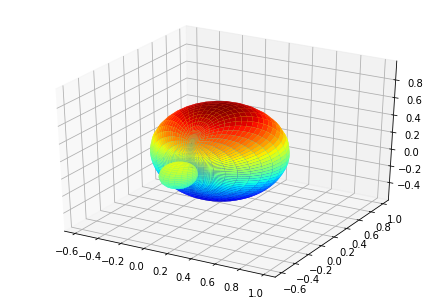

In [16]:
# Rotations (z,x,y) case
Y10rot, _, _ = ep.TKQarrayRotX(Y10, RXdefault)
ep.sphFromBLMPlot(Y10rot, facetDim = 'Euler', pType='a', plotFlag = True);

Plotting with mpl
Data dims: ('Euler', 'Theta', 'Phi'), subplots on Euler


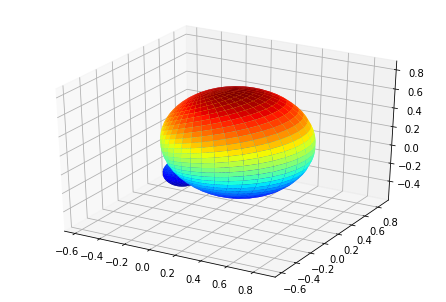

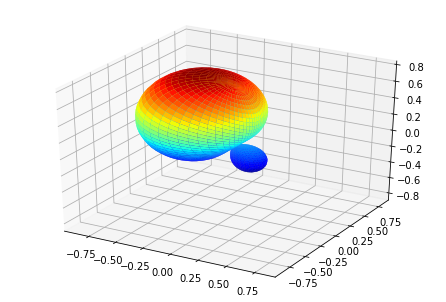

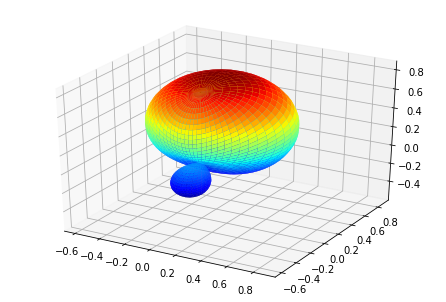

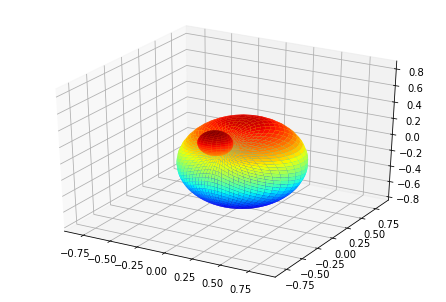

In [22]:
# Rotations +/-45 deg cases
Y10rot, _, _ = ep.TKQarrayRotX(Y10, RX)
ep.sphFromBLMPlot(Y10rot, facetDim = 'Euler', pType='a', plotFlag = True);

In [44]:
# Tabulate with Pandas
# RX.Labels.values
# Y10rot['Labels'] = RX.Labels  # Not working???
# Y10rot

# This works, but messy - ideally want to sort by label and drop dims
Y10rotpd = Y10rot.unstack().stack(plotDim = ('K','Q','S','P','T','C')).to_pandas().dropna(axis = 1).T
Y10rotpd

t                                                         0
K Q  S P         T        C                                
0 -1 0 -3.141593 0.785398  3.141593e+00  0.000000+0.000000j
        0.000000 0.785398  0.000000e+00  0.000000+0.000000j
        1.570796 0.785398  1.110223e-16  0.000000+0.000000j
                 2.356194 -1.110223e-16  0.000000+0.000000j
   0 0 -3.141593 0.785398  3.141593e+00  1.000000+0.000000j
        0.000000 0.785398  0.000000e+00  1.000000+0.000000j
        1.570796 0.785398  1.110223e-16  1.000000+0.000000j
                 2.356194 -1.110223e-16  1.000000+0.000000j
   1 0 -3.141593 0.785398  3.141593e+00  0.000000+0.000000j
        0.000000 0.785398  0.000000e+00  0.000000+0.000000j
        1.570796 0.785398  1.110223e-16  0.000000+0.000000j
                 2.356194 -1.110223e-16  0.000000+0.000000j
1 -1 0 -3.141593 0.785398  3.141593e+00 -0.650000-0.000000j
        0.000000 0.785398  0.000000e+00  0.650000+0.000000j
        1.570796 0.785398  1.110223e-16  0.000000+0.650000j
                 2.356194 -1.110223e-16  0.000000+0.650000j
   0 0 -3.141593 0.785398  3.141593e+00  0.919239+0.000000j
        0.000000 0.785398  0.000000e+00  0.919239+0.000000j
        1.570796 0.785398  1.110223e-16  0.919239+0.000000j
                 2.356194 -1.110223e-16 -0.919239+0.000000j
   1 0 -3.141593 0.785398  3.141593e+00  0.650000-0.000000j
        0.000000 0.785398  0.000000e+00 -0.650000+0.000000j
        1.570796 0.785398  1.110223e-16 -0.000000+0.650000j
                 2.356194 -1.110223e-16 -0.000000+0.650000j

In [8]:
Ysum = ep.blmXarray(np.array([[1,0,1],[2,0,0.3]]), 1)
Ysum

<xarray.DataArray (Eke: 1, BLM: 2)>
array([[1. , 0.3]])
Coordinates:
  * Eke      (Eke) int64 1
  * BLM      (BLM) MultiIndex
  - l        (BLM) int64 1 2
  - m        (BLM) int64 0 0
Attributes:
    dataType:  BLM

Plotting with mpl
Data dims: ('Eke', 'Theta', 'Phi'), subplots on Eke


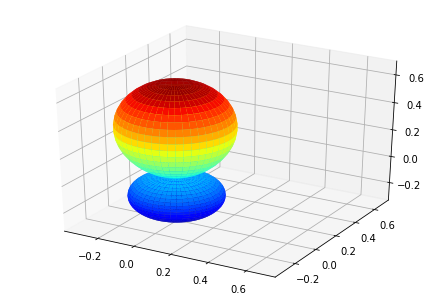

In [9]:
ep.sphFromBLMPlot(Ysum, facetDim = 'Eke', pType='a', plotFlag = True);